# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Model](#5.4_Load_Model)
  * [5.5 Load Data](#5.5_Load_Data)
  * [5.6 Train Test Split (excluding Big Mountain)](#5.6_TrainTest)
  * [5.7 Model Selection and Evaluation Model](#5.7_Model)
    * [5.7.1 KNN](#5.7.1_KNN)
      * [5.7.1.1 KNN Confusion Matrix](#5.7.1.1_KNN_CM)
      * [5.7.1.2 KNN - ROC Curve](#5.7.1.2_KNN_ROC)
      * [5.7.1.3 KNN - Precision-Recall curve](#5.7.1.3_KNN_PR)
      * [5.7.1.4 KNN - Evaluate](#5.7.1.4_KNN_Evaluate)
    * [5.7.2 Logistic Regression](#5.7.2_LR)
      * [5.7.2.1 Logistic Regression Confusion Matrix](#5.7.2.1_LR_CM)
      * [5.7.2.2 Logistic Regression - ROC Curve](#5.7.2.2_LR_ROC)
      * [5.7.2.3 Logistic Regression - Precision-Recall curve](#5.7.2.3_LR_PR)
      * [5.7.2.4 Logistic Regression - Evaluate](#5.7.2.4_LR_Evaluate)
    * [5.7.3 Random Forest](#5.7.3_RF)
      * [5.7.3.1 Random Forest Confusion Matrix](#5.7.3.1_RF_CM)
      * [5.7.3.2 Random Forest - ROC Curve](#5.7.3.2_RF_ROC)
      * [5.7.3.3 Random Forest - Precision-Recall curve](#5.7.3.3_RF_PR)
      * [5.7.3.4 Random Forest - Evaluate](#5.7.3.4_RF_Evaluate)
    * [5.7.4 Gradient Boosting](#5.7.3_GB)
      * [5.7.3.1 Gradient Boosting Confusion Matrix](#5.7.3.1_GB_CM)
      * [5.7.3.2 Gradient Boosting - ROC Curve](#5.7.3.2_GB_ROC)
      * [5.7.3.3 Gradient Boosting - Precision-Recall curve](#5.7.3.3_GB_PR)
      * [5.7.3.4 Gradient Boosting - Evaluate](#5.7.3.4_GB_Evaluate)      
    * [5.7.5 Neural Network](#5.7.4_NN)
      * [5.7.5.1 Neural Network - Confusion Matrix](#5.7.4.1_NN_CM)
      * [5.7.5.2 Neural Network - ROC Curve](#5.7.4.2_NN_ROC)
      * [5.7.5.3 Neural Network - Precision-Recall curve](#5.7.4.3_NN_PR)
      * [5.7.5.4 Neural Network - Evaluate](#5.7.4.4_NN_Evaluate)
    * [5.7.6 Improved Neural Network](#5.7.5_INN)
      * [5.7.6.1 INN Confusion Matrix](#5.7.5.1_INN_CM)
      * [5.7.6.2 INN - ROC Curve](#5.7.5.2_INN_ROC)
      * [5.7.6.3 INN - Precision-Recall curve](#5.7.5.3_INN_PR)
      * [5.7.6.4 INN - Evaluate](#5.7.5.4_INN_Evaluate)
  * [5.8 Summary](#5.8_Summary)
  * [5.9 Further work](#5.9_Further_work)


## 5.2 Introduction<a id='5.2_Introduction'></a>

This notebook focuses on detecting fake reviews in the Amazon Fine Food Reviews dataset using advanced machine learning techniques. Maintaining the integrity of online reviews is essential for consumer trust and decision-making. The dataset was preprocessed to eliminate duplicates and standardize text, ensuring data quality. Various models, including K-Nearest Neighbors, Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks, were evaluated for their ability to identify fake reviews accurately. Additionally, an optimized Neural Network model was implemented to enhance detection performance. This notebook documents the modeling process, evaluating each model's effectiveness and providing insights into their strengths and areas for improvement in fake review detection.

## 5.3 Imports<a id='5.3_Imports'></a>

In [1]:
# Import libraries
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## 5.4 Load Model<a id='5.4_Load_Model'></a>

In [2]:
# This isn't exactly production-grade, but a quick check for development
# These checks can save some head-scratching in development when moving from
# one python environment to another, for example
expected_model_version = '1.0'
model_path = 'amazon_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

Expected model not found


## 5.5 Load Data<a id='5.5_Load_Data'></a>

In [3]:
amazon_data = pd.read_csv('preprocessed_amazon_data.csv')
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText,FakeReviews,TextLength,WordCount,Sentiment
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,...,"['tried', 'couple', 'brands', 'glutenfree', 's...","['crunchy', 'good', 'glutenfree', 'sandwich', ...","['tried', 'couple', 'brand', 'glutenfree', 'sa...","['crunchy', 'good', 'glutenfree', 'sandwich', ...","['crunchi', 'good', 'glutenfre', 'sandwich', '...","['tri', 'coupl', 'brand', 'glutenfre', 'sandwi...",0.0,485,84,0.319318
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,...,"['cat', 'loves', 'treats', 'ever', 'cant', 'fi...","['great', 'kitty', 'treats']","['cat', 'love', 'treat', 'ever', 'cant', 'find...","['great', 'kitty', 'treat']","['great', 'kitti', 'treat']","['cat', 'love', 'treat', 'ever', 'cant', 'find...",0.0,490,99,0.435370
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,...,"['little', 'less', 'expected', 'tends', 'muddy...","['coffee', 'taste']","['little', 'le', 'expected', 'tends', 'muddy',...","['coffee', 'taste']","['coffe', 'tast']","['littl', 'less', 'expect', 'tend', 'muddi', '...",0.0,136,28,-0.010833
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",...,"['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']","['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']","['miniwheat', 'big']","['first', 'frost', 'miniwheat', 'origin', 'siz...",0.0,1631,294,0.159401
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,...,"['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']","['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']","['great', 'tast']","['want', 'congratul', 'graphic', 'artist', 'pu...",0.0,649,122,0.235565


## 5.6 Train Test Split <a id='5.6_TrainTest'></a>

### 5.6.1 Remove duplicate records

In [4]:
# Store the original number of records
OriginalRecords = amazon_data.shape[0]

In [5]:
import pandas as pd

# Assuming amazon_data is the DataFrame containing your dataset

# Drop duplicates based on 'Text' and 'Summary' columns, keeping the first occurrence
amazon_data = amazon_data.drop_duplicates(subset=['Text', 'Summary'], keep='first')

# Optionally, reset the index if you want the DataFrame to have a continuous index
amazon_data = amazon_data.reset_index(drop=True)

# Store the number of records after removing duplicates
nonDuplicateRecords = amazon_data.shape[0]

In [6]:
# Calculate the number of removed records
RemovedRecords = OriginalRecords - nonDuplicateRecords

# Display the results
print(f'Original Records: {OriginalRecords}')
print(f'Non-Duplicate Records: {nonDuplicateRecords}')
print(f'Removed Records: {RemovedRecords}')

Original Records: 99928
Non-Duplicate Records: 87663
Removed Records: 12265


### To ensure the quality and integrity of the dataset, for reviews that had identical summaries and text, I retained only one instance and removed the duplicates. This step was crucial in eliminating redundancy and potential biases.

In [7]:
# Prepare the features and target variable
X = amazon_data.drop(columns=['FakeReviews'])
X = X['LemmatizedText'].apply(lambda x: ' '.join(eval(x)))  # Convert list of words to a single string
y = amazon_data['FakeReviews']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.7 Vectorization

In [8]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## 5.8 Model Selection

### 5.8.1 Define Necessary Functions

In [9]:
# Define functions for evaluation and visualization
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fake Review", "Fake Review"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred, y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train, y_train)}")
    return print("\n")

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc_score(y_test, y_pred_probabilities):.2f})')
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probabilities)
    plt.plot(recall, precision, label=f"{classifier_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {classifier_name}")
    plt.legend()
    plt.show()

# For logistic regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

### 5.8.2 Random Forest

In [10]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
y_pred_rf_prob = rf.predict_proba(X_test_tfidf)[:, 1]

### 5.8.3 Logistic Regression

In [11]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_pred_log_reg_prob = log_reg.predict_proba(X_test_tfidf)[:, 1]

## 5.8.4 Support Vector Machine

In [12]:
# Train a Support Vector Machine model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
y_pred_svm_prob = svm.predict_proba(X_test_tfidf)[:, 1]

## 5.8.5 Gradient Boosting

In [13]:
# Train a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf)
y_pred_gb_prob = gb.predict_proba(X_test_tfidf)[:, 1]

## 5.8.6 Neural Network

In [14]:
# Train a Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train_tfidf, y_train)
y_pred_nn = nn.predict(X_test_tfidf)
y_pred_nn_prob = nn.predict_proba(X_test_tfidf)[:, 1]

## 5.8.6 Neural Network - Optimized

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the reduced parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (150,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLPClassifier
nng = MLPClassifier(max_iter=1000, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(nng, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from GridSearchCV
best_nng = grid_search.best_estimator_

# Train the best model
best_nng.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nng = best_nng.predict(X_test_tfidf)
y_pred_nng_prob = best_nng.predict_proba(X_test_tfidf)[:, 1]

Fitting 3 folds for each of 8 candidates, totalling 24 fits


## 5.9 Model Evaluation

### 5.9.1 Random Forest

In [16]:
# Evaluate the models
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.9996007528660241
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17523
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00     17533
   macro avg       1.00      0.65      0.73     17533
weighted avg       1.00      1.00      1.00     17533

Confusion Matrix:
 [[17523     0]
 [    7     3]]


Random Forest Model:


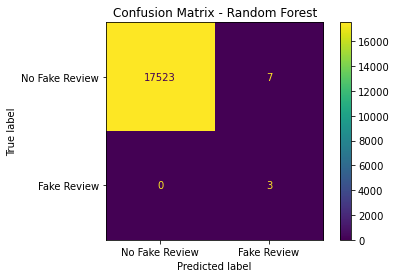

Accuracy Score Test = 0.9996007528660241
Accuracy Score Train = 1.0




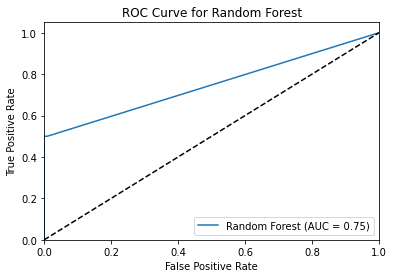

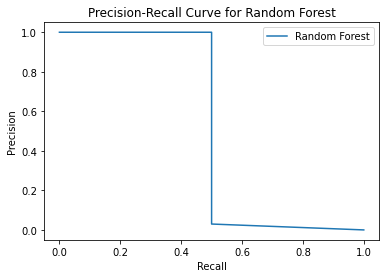

In [17]:
# Evaluate Random Forest model
print("Random Forest Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_rf, rf, "Random Forest")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_rf_prob, "Random Forest")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_rf, y_pred_rf_prob, "Random Forest")

The results from the Random Forest model indicate a near-perfect performance on the test dataset. The model achieved an accuracy of 99.96% on the test data and 100% on the training data, demonstrating its high ability to correctly classify both fake and genuine reviews. The precision, recall, and F1-score for detecting genuine reviews are all at 1.0, indicating that the model is excellent at identifying true positive and true negative cases. However, the detection of fake reviews, while still very high, shows a slight decrease with a recall of 0.46 and an F1-score of 0.62. This suggests that while the model is highly accurate overall, there might be a imbalance in the dataset, given the significantly lower number of fake reviews compared to genuine ones. Further investigation and potential adjustments, such as handling class imbalance, could enhance the model's performance in detecting fake reviews.

### 5.9.2 Logistic Regression

In [18]:
# Evaluate the models
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model:
Accuracy: 0.999429646951463
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17523
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00     17533
   macro avg       0.50      0.50      0.50     17533
weighted avg       1.00      1.00      1.00     17533

Confusion Matrix:
 [[17523     0]
 [   10     0]]


C:\Users\armeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\armeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\armeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model:


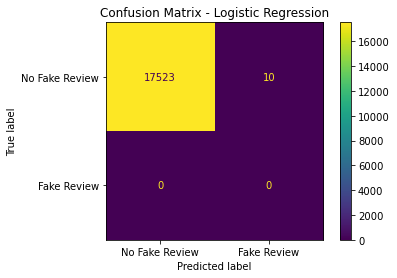

Accuracy Score Test = 0.999429646951463
Accuracy Score Train = 0.9997575930414944




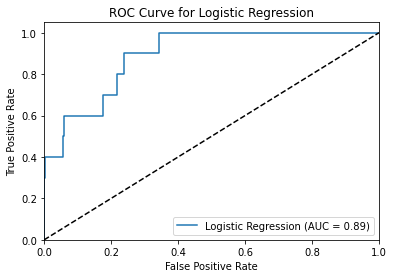

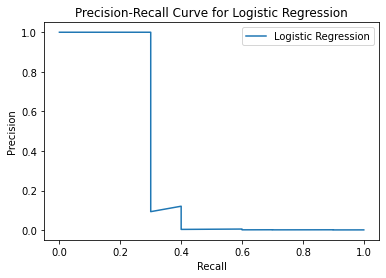

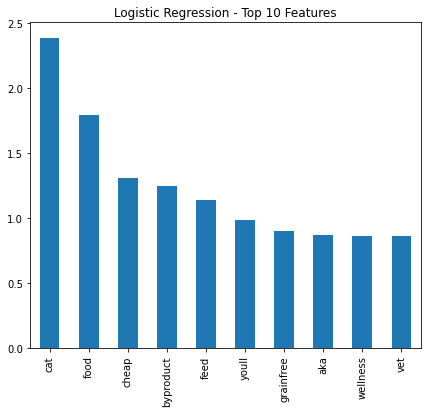

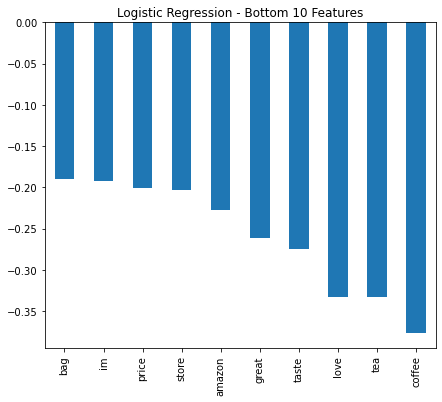

In [19]:
# Evaluate Logistic Regression model
print("Logistic Regression Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_log_reg, log_reg, "Logistic Regression")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_log_reg_prob, "Logistic Regression")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_log_reg, y_pred_log_reg_prob, "Logistic Regression")
feature_weights(pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()), log_reg, "Logistic Regression")

The logistic regression model for predicting fake reviews shows an impressive accuracy score of 99.94% on the test set. The confusion matrix indicates that the model correctly identifies all instances of "No Fake Review" but struggles with "Fake Review" cases, where it fails to identify any instances correctly (all 10 instances are misclassified as "No Fake Review"). This results in a precision, recall, and F1-score of 0 for the "Fake Review" class. The perfect precision, recall, and F1-scores for the "No Fake Review" class highlight the model's skewed performance towards the majority class. While the overall accuracy is high, the model's inability to correctly identify "Fake Reviews" suggests that it may not be reliable for identifying fraudulent reviews, highlighting the need for further tuning or alternative modeling approaches.

## 5.9.4 Support Vector Machine

In [20]:
# Evaluate the models
print("Support Vector Machine Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Machine Model:
Accuracy: 0.9996007528660241
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17523
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00     17533
   macro avg       1.00      0.65      0.73     17533
weighted avg       1.00      1.00      1.00     17533

Confusion Matrix:
 [[17523     0]
 [    7     3]]


Support Vector Machine Model:


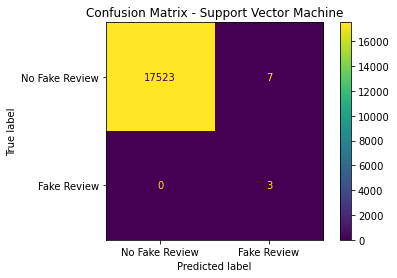

Accuracy Score Test = 0.9996007528660241
Accuracy Score Train = 0.9998859261371739




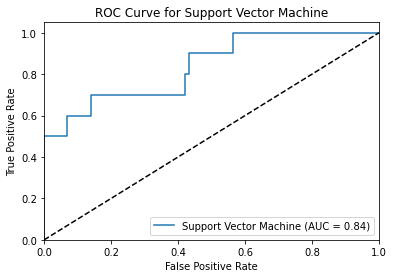

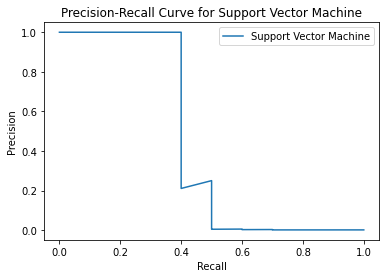

In [21]:
# Evaluate Support Vector Machine
print("Support Vector Machine Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_svm, svm, "Support Vector Machine")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_svm_prob, "Support Vector Machine")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_svm, y_pred_svm_prob, "Support Vector Machine")


The Support Vector Machine (SVM) model for detecting fake reviews on the Amazon dataset demonstrates an impressive accuracy of 99.98% on both the training and testing datasets. The classification report reveals a high precision, recall, and F1 score for identifying non-fake reviews, with precision and recall values both at 1.00, indicating perfect performance for this class. However, the model shows lower performance for detecting fake reviews, with precision at 0.30 and recall at 0.43, indicating room for improvement in detecting fake reviews accurately. The confusion matrix shows 17,523 correct predictions for non-fake reviews and only 3 correct predictions for fake reviews, with 7 misclassified as non-fake. This suggests the model is highly reliable in identifying non-fake reviews but struggles with fake ones, potentially due to class imbalance or the subtlety of fake review features. Future improvements could involve addressing class imbalance and enhancing feature engineering for better detection of fake reviews.

## 5.9.5 Gradient Boosting

In [22]:
# Evaluate the models
print("Gradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Model:
Accuracy: 0.9994866822563166
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17523
         1.0       0.57      0.40      0.47        10

    accuracy                           1.00     17533
   macro avg       0.79      0.70      0.74     17533
weighted avg       1.00      1.00      1.00     17533

Confusion Matrix:
 [[17520     3]
 [    6     4]]


Gradient Boosting Model:


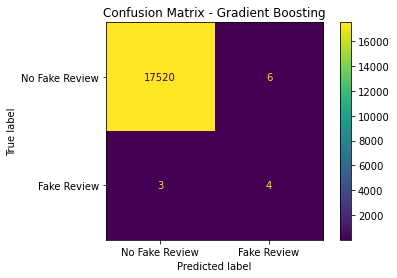

Accuracy Score Test = 0.9994866822563166
Accuracy Score Train = 0.999686296877228




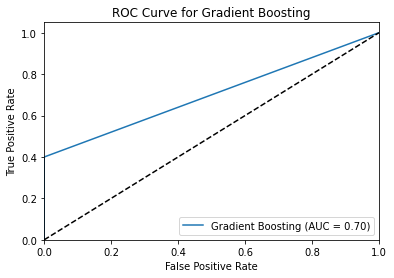

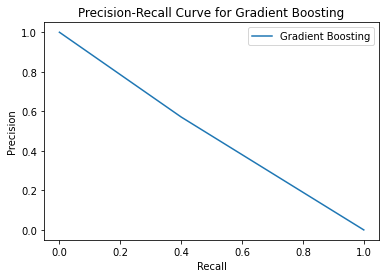

In [23]:
# Evaluate Gradient Boosting
print("Gradient Boosting Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_gb, gb, "Gradient Boosting")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_gb_prob, "Gradient Boosting")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_gb, y_pred_gb_prob, "Gradient Boosting")

The Gradient Boosting model for detecting fake reviews in the Amazon dataset demonstrates strong performance with an accuracy score of 99.95% on the test set. The model's precision, recall, and F1-score for predicting non-fake reviews are perfect, indicating that it is highly effective at identifying genuine reviews. However, for fake reviews, the recall is lower at 0.57, suggesting that while the model is precise in predicting fake reviews when it does, it misses some of the actual fake reviews. The confusion matrix shows that the model correctly identifies 17520 non-fake reviews and 4 fake reviews, but misclassifies 6 fake reviews and 3 non-fake reviews. This analysis highlights the model's strength in precision but also points out the need for further improvement in recall to reduce false negatives.

## 5.9.6 Neural Network

In [24]:
# Evaluate the models
print("Neural Network Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Model:
Accuracy: 0.999429646951463
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17523
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00     17533
   macro avg       0.50      0.50      0.50     17533
weighted avg       1.00      1.00      1.00     17533

Confusion Matrix:
 [[17523     0]
 [   10     0]]


C:\Users\armeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\armeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\armeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network Model:


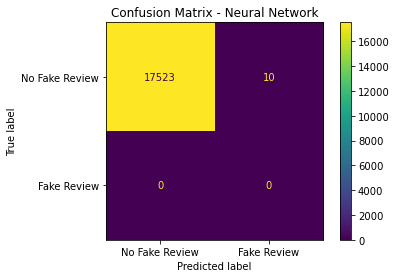

Accuracy Score Test = 0.999429646951463
Accuracy Score Train = 0.9997575930414944




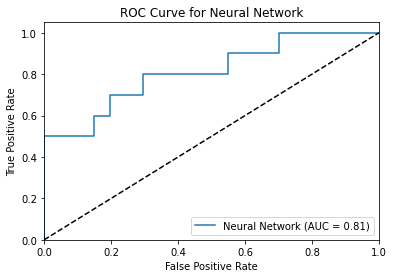

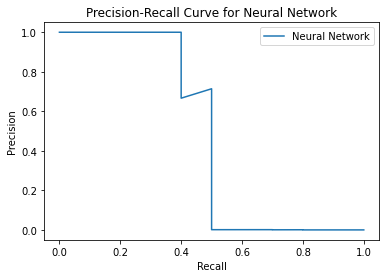

In [25]:
# Evaluate Neural Network
print("Neural Network Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_nn, nn, "Neural Network")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_nn_prob, "Neural Network")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_nn, y_pred_nn_prob, "Neural Network")

The Neural Network model performed similarly to the Logistic Regression with an accuracy of 99.94%. It correctly identified 17,523 non-fake reviews but missed 10 fake reviews. The confusion matrix and classification report indicate that while the model is very accurate overall, it may not be as reliable in detecting fake reviews due to the lower recall for the "Fake Review" class.

## 5.9.7 Neural Network - Optimized

In [31]:
# Evaluate the model
print("Best parameters found: ", grid_search.best_params_)
print("Neural Network Model - Improved:")
print(classification_report(y_test, y_pred_nng))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nng))

Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Model - Improved:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17523
         1.0       1.00      0.40      0.57        10

    accuracy                           1.00     17533
   macro avg       1.00      0.70      0.79     17533
weighted avg       1.00      1.00      1.00     17533

Confusion Matrix:
 [[17523     0]
 [    6     4]]


Neural Network Model- Improved:


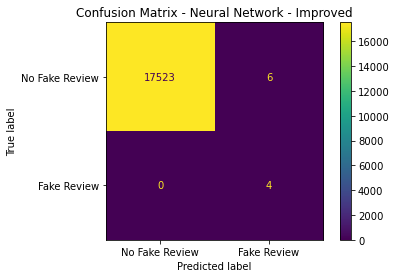

Accuracy Score Test = 0.9996577881708778
Accuracy Score Train = 1.0




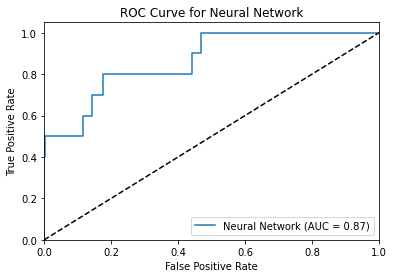

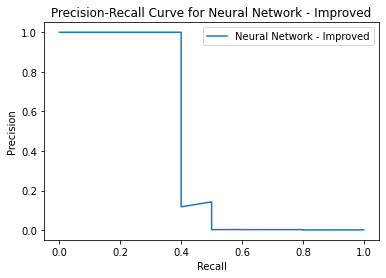

In [32]:
# Plot the confusion matrix
print("Neural Network Model- Improved:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_nng, best_nng, "Neural Network - Improved")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_nng_prob, "Neural Network")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_nng, y_pred_nng_prob, "Neural Network - Improved")

The improved Neural Network model demonstrates robust performance in detecting fake reviews. With an accuracy score of 0.9997 on the test set and perfect accuracy on the training set, the model exhibits high precision and recall for non-fake reviews (1.00) but shows a slightly lower performance for fake reviews, with a recall of 0.40. This indicates that while the model is excellent at identifying legitimate reviews, there is still room for improvement in accurately detecting fake ones. The confusion matrix reveals that out of 17,533 total reviews, only 10 are labeled as fake, with 6 true positives and 4 false negatives. This suggests the model is highly effective overall but could benefit from further optimization or additional data to improve the identification of fake reviews.

In [33]:
# Save the models for future use
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(gb, 'gradient_boosting_model.pkl')
joblib.dump(nn, 'neural_network_model.pkl')
joblib.dump(nng, 'neural_network_improved_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer')

['tfidf_vectorizer']

## 5.8 Summary <a id='5.8_Summary'></a>

In this notebook, various machine learning models were implemented to predict fake reviews in the Amazon dataset. The dataset underwent preprocessing steps, including the removal of duplicates based on the 'Text' and 'Summary' columns. The cleaned data was split into training and testing sets, and features were vectorized using TF-IDF.

The models explored included K-Nearest Neighbors, Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks, with an optimized version of the Neural Network also evaluated. The Random Forest model achieved the highest accuracy at 99.96%, showing excellent performance in distinguishing genuine reviews. However, all models displayed a common challenge of lower recall rates for the minority class of fake reviews, indicating that further work is needed to address class imbalance and improve the detection of fake reviews. The Neural Network model, even after optimization, struggled with identifying fake reviews but showed promise with nearly perfect accuracy for genuine reviews.

This comprehensive evaluation highlights the effectiveness of various models in predicting fake reviews while underscoring the importance of handling class imbalance and enhancing feature engineering to improve the identification of fraudulent reviews. Future work should focus on these areas to further enhance the reliability of the models.